In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
from lib.gif import create_gif
from population import *
import cv2
from individual import Individual, Polygon
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
from pathlib import Path
plt.rcParams['figure.facecolor'] = 'white'


Polygon(n_points=4, color=[0.763 0.867 0.297], coords=[[146, 6], [73, 182], [124, 101], [46, 198]])


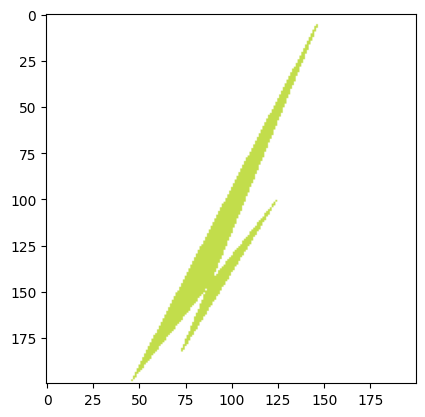

In [3]:
p = Polygon()
print(p)
p.draw()

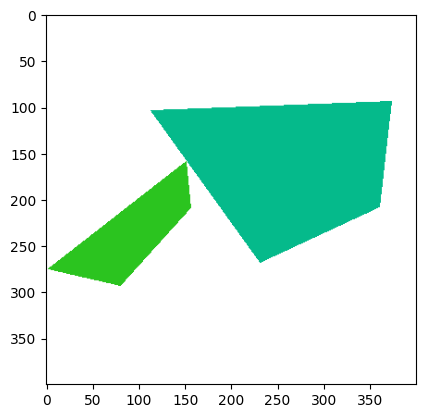

In [4]:
ind = Individual(n_polygons=2, canvas_size=(400, 400, 3), mutate_p=1, add_or_del_p=0.0)
ind.draw()
plt.imshow(ind.get_image())

In [12]:
ind = Individual(n_polygons=5, canvas_size=(400, 400, 3), mutate_p=0.5, add_or_del_p=0.1)
# fig = plt.figure(figsize=(10,10))
dir = Path('img/polygon_mutation/')
os.makedirs(dir/'iters', exist_ok=True)
for i in tqdm(range(50)):
    plt.title(f'Iteration {i}')
    ind.mutate()
    ind.draw()
    plt.imshow(ind.img)
    plt.savefig(f"{dir}/iters/polygon_mutation_{i:03}.png", dpi=150, bbox_inches='tight')
    plt.close()

create_gif(src_dir=dir/'iters', fp_out=dir/'mutation.gif')


100%|██████████| 50/50 [00:15<00:00,  3.23it/s]


Image saved at img\polygon_mutation\mutation.gif.


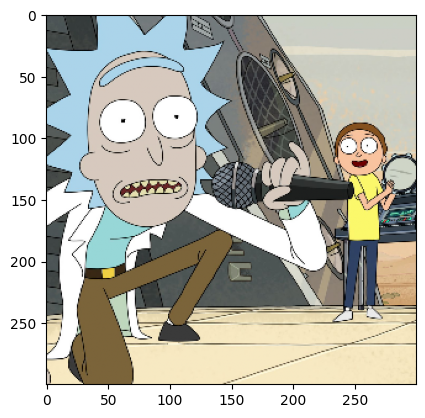

In [4]:
TARGET = plt.imread('../targets/rick.jpg')
TARGET = cv2.resize(TARGET, (300, 300))
TARGET = TARGET / 255
plt.imshow(TARGET)

In [6]:
n_iter = 5000
pop = Population(popsize=40, target=TARGET, add_or_del_p=0.2, n_polygons=20)
pop.optimize(n_iter=n_iter, plot=True, dir_name='rick_polygons')

Output()

  0%|          | 0/5000 [00:00<?, ?it/s]